<h1><center><b>Tema: Criminalidade Cidade São Paulo</b></center></h1>

<h1 style="background-color:#B0E0E6; ">1 - Apresentação do Problema:</center></h1><br>
A criminalidade é um problema recorrente na cidade de São Paulo, e uma das formas para se combater a criminalidade e conhecer o seu comportamento dentro da área geográfica da cidade e analisando os dados é possivel obter um entendimento de como a bandidagem atua e desta forma usando técnicas de Ciências de Dados conseguimos entender melhor o que está acontecendo e gerar "insights" que direcionem ações capazes de reduzir os índices de criminalidade.


<center> <h1>Obtenção dos Dados</h1></center>

Os dados utilizados para esse trabalho foram obtidos na plataforma kaggle (https://www.kaggle.com/danlessa/geospatial-sao-paulo-crime-database) e são referentes a crimes ocorridos na cidade de São Paulo, de 2010-2018 que forma cadastrados na plataforma colaborativa, Onde Fui Roubado.





<center> <h1> Bibliotecas utilizadas</h1></center>

Aqui, utilizaremos a biblioteca `Pandas`, que nos permite trabalhar com arquivos csv com mais facilidade, em um formato tabular.

`Matplotlib` e `Seaborn` são bibliotecas gráficas que utilizaremos para plotar visualizações.

`Numpy` e nos dá suporte para trabalharmos com arrays multidimensionais, matrizes, etc.



In [1]:
# importando os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# definindo o estilo dos gráficos
sns.set_style()

<h1><center>Carga dos dados para a análise</center></h1>

In [2]:
# carregando os dados da planilha excel com campo adicional "data" contendo somente dia, mês e ano da ocorrência
df1 = pd.read_excel('C:/Users/evert/OneDrive/Documentos/PythonPos/TrabalhoPos/ds1.xlsx', parse_dates=['time', 'data'])


# carregando os dados
df = pd.read_csv('https://www.dropbox.com/s/ghgb8xggbhgyuk3/dataset-limpo.csv?dl=1', parse_dates=['time'])
# transformando a coluna `time` em datetime, e definindo como índice do dataframe
df.index = pd.to_datetime(df['time'], infer_datetime_format=True)



<h1 style="background-color:#B0E0E6; " >2 - Dicionário de Dados</h1>


* `id` - Número de identificação da ocorrência
* `bairro` - Bairro onde ocorreu o crime
* `created_at` - Data de criação da ocorrência
* `descricao` - Descrição da ocorrência
* `endereco` - Endereço da ocorrência
* `id.1` - Desconhecido
* `ip_address_origin` -  Endereço de IP de quem criou o registro
* `latitude` - Latitude da ocorrência
* `longitude` - Longitude da ocorrência
* `registrou_bo` - Indica se a vítima registrou boletim de ocorrência
* `sexo` - Sexo da vítima
* `tipo_assalto_id` - Tipo de assalto
* `titulo` - Título da ocorrência
* `uri` - URI do incidente
* `user_id` - ID do usuário
* `valor_prejuizo` - Valor do prejuízo em reais

As variáveis abaixo tem como valor True e NaN (Nulo). 

Quando true, significa que o item foi roubado. Caso seja NaN, significa que não foi roubado.

* `Bicicleta`
* `Bolsa ou Mochila`
* `Carteira`
* `Cartão de Crédito`
* `Celular`
* `Computador`
* `DVD`
* `Dinheiro`
* `Documentos`
* `Equipamento de Som`
* `Estepe`
* `MP4 ou Ipod`
* `Móveis`
* `Notebook`
* `Outros`
* `Relógio`
* `Som`
* `Tablet`
* `Tv`


* `time` - Data e horário do incidente

<h3><center>Verificando as primeiras e últimas entradas</center></h3>

In [3]:
# verificando as 3 primeiras entradas do dataframe
df.head(3)


,id,bairro,created_at,descricao,endereco,id.1,ip_address_origin,latitude,longitude,registrou_bo,...,Estepe,MP4 ou Ipod,Móveis,Notebook,Outros,Relógio,Som,Tablet,Tv,time
time,,,,,,,,,,,,,,,,,,,,,
2010-12-20 20:30:00,49787,Butantã,2015-06-16 23:34:01.000,"5 bandidos, armas, entraram em casa e vasculha...","Avenida Trona Constanzo, 177, Butantã",49787,NaN,-23.580973,-46.719192,True,...,NaN,True,NaN,True,NaN,NaN,True,True,True,2010-12-20 20:30:00
2012-01-11 14:00:00,10679,Itaquera,2013-09-11 18:26:31.819,"Meu caso foi para o Pequenas Causas, ganhamos ...","Avenida José Pinheiro Borges, 450-876 - Itaque...",10679,187.11.1.51,-23.540105,-46.462872,True,...,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,2012-01-11 14:00:00
2012-01-11 14:00:00,10682,Itaquera,2013-09-11 18:42:07.858,"Meu caso foi para o Pequenas Causas, ganhamos ...",Rua Corínthians - Itaquera - Shopping Metrô It...,10682,189.19.160.82,-23.541765,-46.469562,True,...,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,2012-01-11 14:00:00


In [4]:
# verificando as 3 últimas entradas do dataframe
df.tail(3)

,id,bairro,created_at,descricao,endereco,id.1,ip_address_origin,latitude,longitude,registrou_bo,...,Estepe,MP4 ou Ipod,Móveis,Notebook,Outros,Relógio,Som,Tablet,Tv,time
time,,,,,,,,,,,,,,,,,,,,,
2012-03-03 13:15:00,78360,Vila Joao Ramalho,2017-03-04 12:35:27.990,Estava no ônibus voltando pra casa no ponto fi...,"R. Dom Henrique, 2 - Vila Joao Ramalho, Santo ...",78360,177.103.229.244,-23.713219,-46.509625,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-03-03 13:15:00
2012-03-02 21:01:00,3080,Campo Belo,2013-08-16 17:38:04.049,Um carro me seguiu quando saí do supermercado...,"Rua Acalifas, 52 - Campo Belo, São Paulo, 0462...",3080,200.161.48.250,-23.629757,-46.669933,True,...,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,2012-03-02 21:01:00
2012-03-02 09:44:00,7462,Pinheiros,2013-08-22 01:49:00.275,"Minha mochila estava nas costas, estava quase ...","Avenida Brigadeiro Faria Lima, 919-1029 - Pinh...",7462,177.32.220.159,-23.566382,-46.694075,False,...,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-03-02 09:44:00


<h3><center> Tamanho e informações sobre o conjunto de dados </center></h3>

In [5]:
# verificando as dimensões
print('Variáveis: ', df.shape[1])
print('Entradas: ', df.shape[0])

Variáveis:  36
Entradas:  12899


Função `info()` para obter as seguintes informações sobre o conjunto de dados:

* Quantidade de Colunas
* Visualizar as colunas
* Quantidade de entradas não nulas
* O tipo de cada variável

In [6]:
# verificando as informações sobre o dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12899 entries, 2010-12-20 20:30:00 to 2012-03-02 09:44:00
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  12899 non-null  int64         
 1   bairro              11196 non-null  object        
 2   created_at          12899 non-null  object        
 3   descricao           12898 non-null  object        
 4   endereco            12899 non-null  object        
 5   id.1                12899 non-null  int64         
 6   ip_address_origin   11705 non-null  object        
 7   latitude            12899 non-null  float64       
 8   longitude           12899 non-null  float64       
 9   registrou_bo        12375 non-null  object        
 10  sexo                12899 non-null  int64         
 11  tipo_assalto_id     12899 non-null  int64         
 12  titulo              12899 non-null  object        
 13  uri        

<h1 style="background-color:#B0E0E6; " >3 - Análise exploratória dos dados</h1>



<strong>3.1 - Utilizando a função `describe()` para obter alguns dados sobre a distribuição estatística das variáveis. </strong>



In [7]:
# Distribuição estatística das variáveis numéricas
df.describe()

,id,id.1,latitude,longitude,sexo,tipo_assalto_id,user_id,valor_prejuizo
count,12899.000000,12899.000000,12899.000000,12899.000000,12899.000000,12899.000000,1166.000000,12899.000000
mean,45901.500194,45901.500194,-23.566805,-46.636817,0.612528,3.230483,16920.901372,2745.264592
std,24974.232979,24974.232979,0.366295,0.439810,0.487192,2.831739,5056.911119,11115.126241
min,21.000000,21.000000,-26.473037,-52.173376,0.000000,1.000000,1900.000000,0.000000
25%,25176.500000,25176.500000,-23.607056,-46.696776,0.000000,2.000000,13039.500000,25.000000
50%,44565.000000,44565.000000,-23.567079,-46.648535,1.000000,2.000000,16914.500000,700.000000
75%,68446.500000,68446.500000,-23.541510,-46.606492,1.000000,3.000000,21038.250000,2000.000000
max,88573.000000,88573.000000,-0.013911,0.004533,1.000000,11.000000,25802.000000,1000000.000000


No nosso caso, temos muitas variáveis numéricas representando categorias com números, e as informações precisam ser acessadas de outra forma. Entretanto, podemos olhar a variável `valor_prejuizo` e tirar alguns insights, como:

* A média de de prejuízo causado pelos crimes é de 2.745,26 reais. 
* O maior prejuízo registrado foi de 1.000.000,00 (Um milhão) de reais.
* O desvio padrão é de 11.115,12 reais, o que indica alta variação. Sabendo que o primeiro quartil está em 25 reais, 
sugere que há *outliers* nesse dataset, elevando a média e o desvio padrão.
* O valor mínimo zero significa que nem todos os crimes registrados causaram prejuízo.



<strong>3.2 - Utilizando a função `describe()` para obter alguns dados sobre a distribuição estatística das variáveis.</strong> 

Incluimos o argumento `include='O'` para buscar as variáveis categóricas.


In [8]:
# distribuição estatística das variáveis categóricas
df.describe(include='O')

,bairro,created_at,descricao,endereco,ip_address_origin,registrou_bo,titulo,uri,Bicicleta,Bolsa ou Mochila,...,Equipamento de Som,Estepe,MP4 ou Ipod,Móveis,Notebook,Outros,Relógio,Som,Tablet,Tv
count,11196,12899,12898,12899,11705,12375,12899,12899,256,3631,...,239,324,552,45,764,5243,1350,106,443,178
unique,1577,12899,12898,11986,10432,2,10169,12899,1,1,...,1,1,1,1,1,1,1,1,1,1
top,São Paulo,2014-10-08 12:43:18.118,"Estava saindo de casa com o meu namorado, quat...",Carregando endereço,127.0.0.1,True,Fui assaltado voltando do trabalho,/denuncias/zJgNra-assaltado-voltando-da-academia,True,True,...,True,True,True,True,True,True,True,True,True,True
freq,630,1,1,15,94,7340,154,1,256,3631,...,239,324,552,45,764,5243,1350,106,443,178


Com base na extração acima podemos observar as seguintes informações:

* Ocorreram 12899 crimes.
* Foram regristrados crimes em 1577 diferentes bairros.
* O Bairro com maior numero de assaltos foi chamado São Paulo que vamos supor que seja centro.
* A maioria das pessoas registrou boletim de ocorrência foram 7340 registros.
* O título mais comum para registro de crime foi "*Fui assaltado voltando do trabalho*".
* O objeto mais roubado são os **celulares**.


<strong>3.3 - Tratamento dos Dados</strong>


Substituir os valores nas variáveis booleanas que contem NaN por False.

In [9]:
# criando uma cópia do dataframe
df_clean = df.copy()

# colunas booleanas
bool_columns = ['Bicicleta', 'Bolsa ou Mochila', 'Carteira','Cartão de Crédito',
                'Celular', 'Computador','DVD', 'Dinheiro' , 'Documentos',
                'Equipamento de Som','Estepe', 'MP4 ou Ipod', 'Móveis',
                'Notebook','Outros', 'Relógio', 'Som', 'Tablet', 'Tv', 'registrou_bo']

# substituindo NaN por False
df_clean[bool_columns] = df_clean[bool_columns].fillna(False)

# verificando o resultado
df_clean.head()

,id,bairro,created_at,descricao,endereco,id.1,ip_address_origin,latitude,longitude,registrou_bo,...,Estepe,MP4 ou Ipod,Móveis,Notebook,Outros,Relógio,Som,Tablet,Tv,time
time,,,,,,,,,,,,,,,,,,,,,
2010-12-20 20:30:00,49787,Butantã,2015-06-16 23:34:01.000,"5 bandidos, armas, entraram em casa e vasculha...","Avenida Trona Constanzo, 177, Butantã",49787,NaN,-23.580973,-46.719192,True,...,False,True,False,True,False,False,True,True,True,2010-12-20 20:30:00
2012-01-11 14:00:00,10679,Itaquera,2013-09-11 18:26:31.819,"Meu caso foi para o Pequenas Causas, ganhamos ...","Avenida José Pinheiro Borges, 450-876 - Itaque...",10679,187.11.1.51,-23.540105,-46.462872,True,...,False,False,False,False,True,False,False,False,False,2012-01-11 14:00:00
2012-01-11 14:00:00,10682,Itaquera,2013-09-11 18:42:07.858,"Meu caso foi para o Pequenas Causas, ganhamos ...",Rua Corínthians - Itaquera - Shopping Metrô It...,10682,189.19.160.82,-23.541765,-46.469562,True,...,False,False,False,False,True,False,False,False,False,2012-01-11 14:00:00
2012-01-11 18:20:00,6166,Morumbi,2013-08-20 11:56:52.717,"Estava parada no semáforo, o bandido veio e es...","Rua Pasquale Gallupi, 347 - Morumbi, São Paulo...",6166,199.67.140.46,-23.611693,-46.725935,True,...,False,False,False,False,False,False,False,False,False,2012-01-11 18:20:00
2012-01-11 08:15:00,6521,Alto de Pinheiros,2013-08-20 17:41:21.569,Arrombaram o porta malas do meu carro e levara...,"Avenida Professor Fonseca Rodrigues, 1655 - Al...",6521,187.92.158.154,-23.544564,-46.721567,True,...,False,False,False,True,True,False,False,False,False,2012-01-11 08:15:00


In [10]:
# checando a porcentagem de valores ausentes para cada variável
(df_clean.isnull().sum() / df_clean.shape[0]).sort_values(ascending=False)

user_id               0.909605
bairro                0.132026
ip_address_origin     0.092565
descricao             0.000078
time                  0.000000
sexo                  0.000000
valor_prejuizo        0.000000
uri                   0.000000
titulo                0.000000
tipo_assalto_id       0.000000
longitude             0.000000
registrou_bo          0.000000
Tv                    0.000000
latitude              0.000000
id.1                  0.000000
endereco              0.000000
created_at            0.000000
Bicicleta             0.000000
Bolsa ou Mochila      0.000000
Carteira              0.000000
MP4 ou Ipod           0.000000
Tablet                0.000000
Som                   0.000000
Relógio               0.000000
Outros                0.000000
Notebook              0.000000
Móveis                0.000000
Estepe                0.000000
Cartão de Crédito     0.000000
Equipamento de Som    0.000000
Documentos            0.000000
Dinheiro              0.000000
DVD     

<strong>3.4 - Preenchendo Dados Ausentes</strong>

Excluir os dados ausentes relacionadas à coluna `bairro` e eliminar as colunas que não serão mais necessárias.

In [11]:
# removendo as linhas com dados ausentes
df_clean.dropna(subset=['bairro'], axis=0, inplace=True)

# removendo a coluna user_id
df_clean.drop(['user_id','ip_address_origin','uri', 'id.1'], axis=1, inplace=True)

In [12]:
# Checando novamente a porcentagem de dados ausetnes
(df_clean.isnull().sum() / df_clean.shape[0]).sort_values(ascending=False)

descricao             0.000089
time                  0.000000
Tv                    0.000000
bairro                0.000000
created_at            0.000000
endereco              0.000000
latitude              0.000000
longitude             0.000000
registrou_bo          0.000000
sexo                  0.000000
tipo_assalto_id       0.000000
titulo                0.000000
valor_prejuizo        0.000000
Bicicleta             0.000000
Bolsa ou Mochila      0.000000
Carteira              0.000000
Cartão de Crédito     0.000000
Celular               0.000000
Computador            0.000000
DVD                   0.000000
Dinheiro              0.000000
Documentos            0.000000
Equipamento de Som    0.000000
Estepe                0.000000
MP4 ou Ipod           0.000000
Móveis                0.000000
Notebook              0.000000
Outros                0.000000
Relógio               0.000000
Som                   0.000000
Tablet                0.000000
id                    0.000000
dtype: f

In [13]:
# verificando o estado atual do dataset
df_clean.head()

,id,bairro,created_at,descricao,endereco,latitude,longitude,registrou_bo,sexo,tipo_assalto_id,...,Estepe,MP4 ou Ipod,Móveis,Notebook,Outros,Relógio,Som,Tablet,Tv,time
time,,,,,,,,,,,,,,,,,,,,,
2010-12-20 20:30:00,49787,Butantã,2015-06-16 23:34:01.000,"5 bandidos, armas, entraram em casa e vasculha...","Avenida Trona Constanzo, 177, Butantã",-23.580973,-46.719192,True,0,6,...,False,True,False,True,False,False,True,True,True,2010-12-20 20:30:00
2012-01-11 14:00:00,10679,Itaquera,2013-09-11 18:26:31.819,"Meu caso foi para o Pequenas Causas, ganhamos ...","Avenida José Pinheiro Borges, 450-876 - Itaque...",-23.540105,-46.462872,True,1,1,...,False,False,False,False,True,False,False,False,False,2012-01-11 14:00:00
2012-01-11 14:00:00,10682,Itaquera,2013-09-11 18:42:07.858,"Meu caso foi para o Pequenas Causas, ganhamos ...",Rua Corínthians - Itaquera - Shopping Metrô It...,-23.541765,-46.469562,True,1,1,...,False,False,False,False,True,False,False,False,False,2012-01-11 14:00:00
2012-01-11 18:20:00,6166,Morumbi,2013-08-20 11:56:52.717,"Estava parada no semáforo, o bandido veio e es...","Rua Pasquale Gallupi, 347 - Morumbi, São Paulo...",-23.611693,-46.725935,True,0,5,...,False,False,False,False,False,False,False,False,False,2012-01-11 18:20:00
2012-01-11 08:15:00,6521,Alto de Pinheiros,2013-08-20 17:41:21.569,Arrombaram o porta malas do meu carro e levara...,"Avenida Professor Fonseca Rodrigues, 1655 - Al...",-23.544564,-46.721567,True,1,1,...,False,False,False,True,True,False,False,False,False,2012-01-11 08:15:00


<strong>3.5 - Proporção entre homens e mulheres</strong>



O Numero `1` representa o sexo `Masculino` e `0`, o `Feminino`.


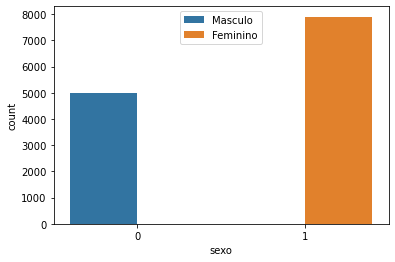

In [14]:

# crimes por sexo
sns.countplot(x='sexo',hue='sexo', data=df); 
plt.legend(['Masculo','Feminino'],loc=9)
plt.show()

In [15]:
# Quantidades por sexo
sexoNum = df['sexo'].groupby(df['sexo'])
sexoNum.count()

sexo
0    4998
1    7901
Name: sexo, dtype: int64

<strong>3.6 -  Boletins de Ocorrência</strong>


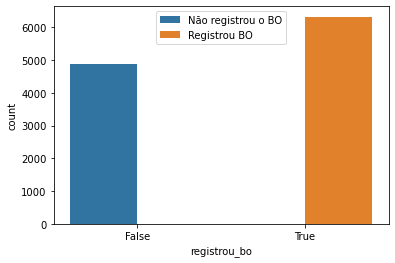

In [16]:
# registro de boletins de ocorrência
sns.countplot(x='registrou_bo',hue='registrou_bo', data=df_clean);
plt.legend(['Não registrou o BO','Registrou BO'],loc=9)
plt.show()

In [17]:
#Quantidades de Registro de BO, True - Registrou, False - Não registrou
boNum = df['registrou_bo'].groupby(df['registrou_bo'])
boNum.count()



registrou_bo
False    5035
True     7340
Name: registrou_bo, dtype: int64

<strong>3.7 -  Criminalidade por bairros</strong>

Gráfico dos bairros com maior ocorrência de crimes.

Abaixo, podemos ver que as regiões com maior número de crimes são:

* São Paulo (Área central)
* Consolação
* Vila Mariana

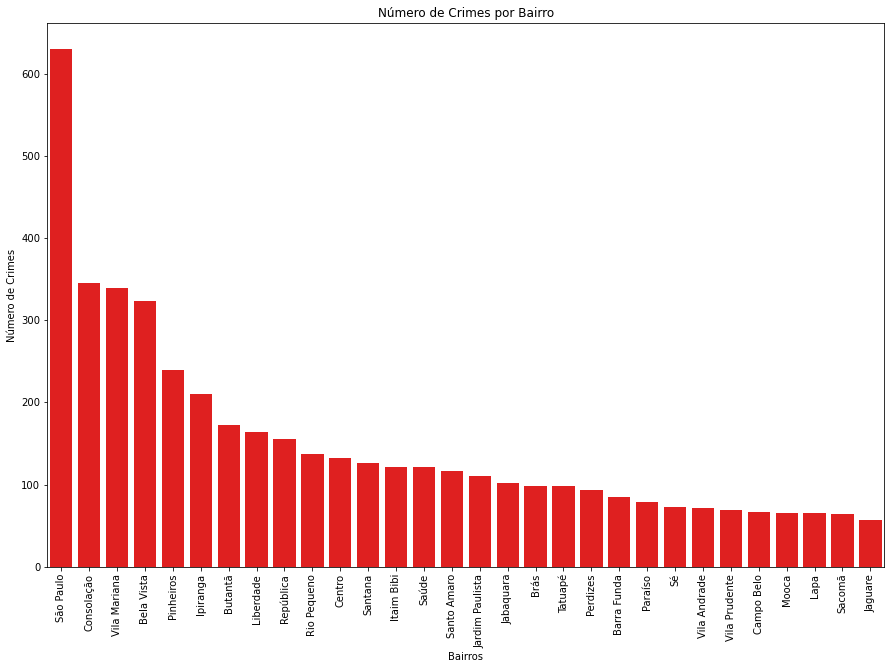

In [18]:
# coletando e ordenando os valores para cada bairro
bairros = df_clean.bairro.value_counts().sort_values(ascending=False).iloc[0:30]

# criando a visualização
fig,ax = plt.subplots(figsize=(15,10))
sns.barplot(bairros.index, bairros.values, color="red");

# definindo o título do eixo y
plt.ylabel('Número de Crimes')
# definindo o título do eixo x
plt.xlabel('Bairros')
# definindo o título da visualização
plt.title('Número de Crimes por Bairro')
# rotacionando a legenda do eixo x para melhor visualização
plt.xticks(rotation=90);
# plotando a visualização
plt.show()

<strong>3.7.1 -  Distribuição dos crimes por localização </strong>

Gráfico de dispesão baseado nas latitudes e longitudes cadastradas.

Homem na cor azul e Mulher na cor rosa.

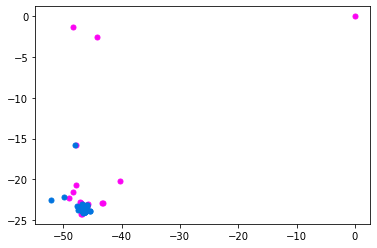

In [19]:
df_homem = df_clean.loc[df_clean['sexo'] == 1]
df_mulher = df_clean.loc[df_clean['sexo'] == 0]

xh = df_homem['longitude']
yh = df_homem['latitude']

xm = df_mulher['longitude']
ym = df_mulher['latitude']

#Grafico de dispersão
import matplotlib.pyplot as plt
#Homem
plt.scatter(xh,yh, s=25, color='#FB04F3')
#Mulher
plt.scatter(xm,ym,  s=25, color='#0174DF')
plt.rcParams['figure.figsize'] =   (10,5)

<strong>3.8 -  Objetos Mais roubados</strong>


Abaixo, podemos ver que os objetos mais roubados são:

* Celulares
* Carteiras
* Documentos
* Mochilas e bolsas

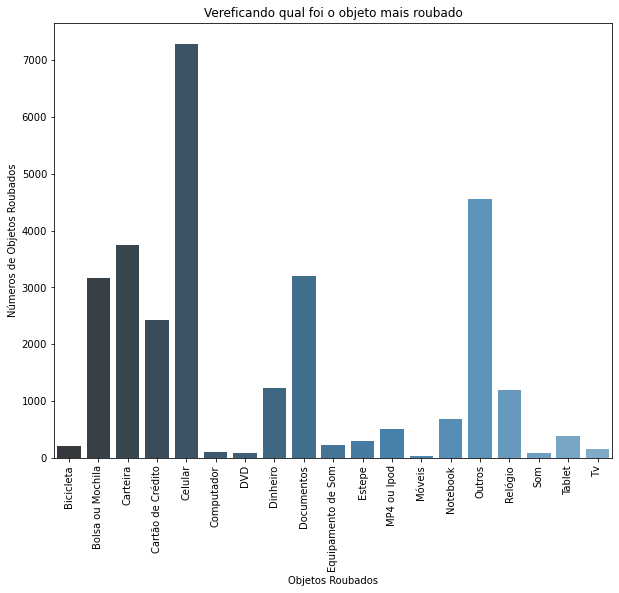

In [20]:
df_roubado = df_clean[['Bicicleta', 'Bolsa ou Mochila', 'Carteira','Cartão de Crédito',
                'Celular', 'Computador','DVD', 'Dinheiro' , 'Documentos',
                'Equipamento de Som','Estepe', 'MP4 ou Ipod', 'Móveis',
                'Notebook','Outros', 'Relógio', 'Som', 'Tablet', 'Tv']]


obj_roubado = df_roubado.sum()


# criando a visualização
fig,ax = plt.subplots(figsize=(10,8))
sns.barplot(obj_roubado.index, obj_roubado.values,
           palette = sns.color_palette("Blues_d", n_colors = len(obj_roubado) +5));
    

# definindo o título do eixo y
plt.ylabel('Números de Objetos Roubados')
# definindo o título do eixo x
plt.xlabel('Objetos Roubados')
# definindo o título da visualização
plt.title('Vereficando qual foi o objeto mais roubado')
# rotacionando a legenda do eixo x para melhor visualização
plt.xticks(rotation=90);
# plotando a visualização
plt.show()

<strong>3.9 Tendência da criminalidade</strong>

A visualização abaixo nos mostra algumas informações, como:

* Pico de criminalidade no ano de 2014
* Diminuição na criminalidade em 2015
* Volta do crescimento entre 2016 e 2017


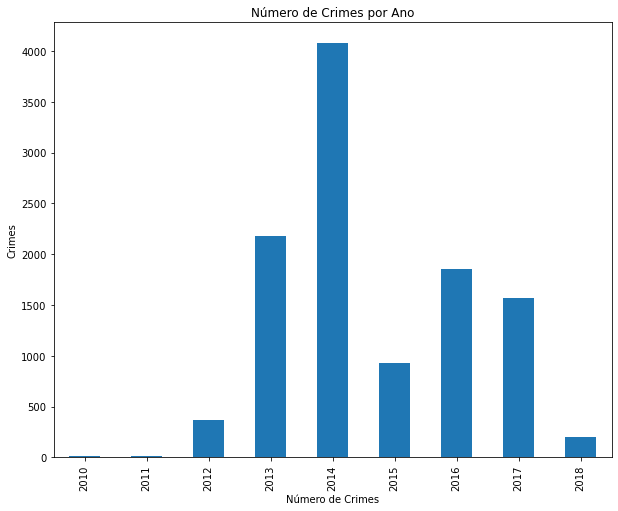

In [21]:
# índice de crimes por ano
# criando a visualização
fig,ax = plt.subplots(figsize=(10,8))
df_clean.groupby([df_clean.index.year]).size().plot(kind='bar')
# definindo o título do eixo y
plt.ylabel('Crimes')
# definindo o título do eixo x
plt.xlabel('Número de Crimes')
# definindo o título da visualização
plt.title('Número de Crimes por Ano')
#plotando a visualização
plt.show()


A visualização abaixo nos mostra algumas informações, como:

O mês de agosto é o mais violento da série.
O Segundo semestre é mais violento que o primeiro.
Dezembro é o menos violento.

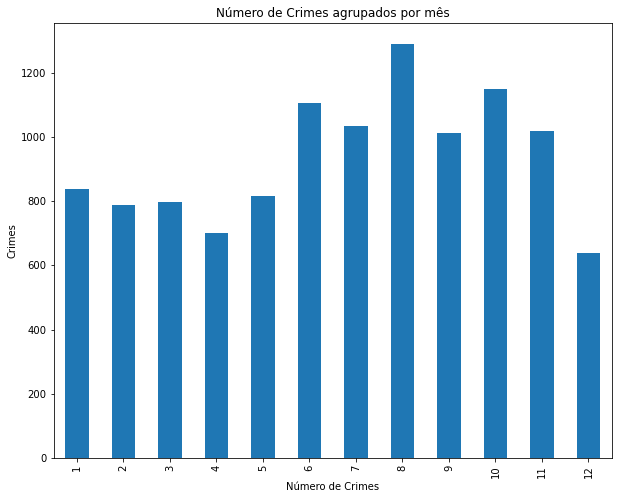

In [22]:
# índice de crimes por Mês
# criando a visualização
fig,ax = plt.subplots(figsize=(10,8))
df_clean.groupby([df_clean.index.month]).size().plot(kind='bar')
# definindo o título do eixo y
plt.ylabel('Crimes')
# definindo o título do eixo x
plt.xlabel('Número de Crimes')
# definindo o título da visualização
plt.title('Número de Crimes agrupados por mês')
#plotando a visualização
plt.show()

A visualização abaixo nos mostra algumas informações interessantes, como:

Os dias da semana com maior criminalidade são quarta, quinta e sexta.

Domingo é o dia da semana com menor criminalidade

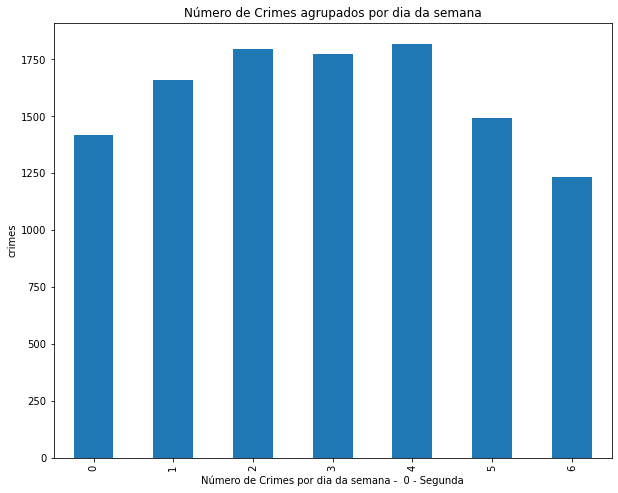

In [23]:
# índice de crimes por dia de semana
# criando a visualização
fig,ax = plt.subplots(figsize=(10,8))
df_clean.groupby([df_clean.index.weekday]).size().plot(kind='bar')
# definindo o título do eixo y
plt.ylabel('crimes')
# definindo o título do eixo x
plt.xlabel('Número de Crimes por dia da semana -  0 - Segunda')
# definindo o título da visualização
plt.title('Número de Crimes agrupados por dia da semana')
#plotando a visualização
plt.show()

A visualização abaixo nos mostra algumas informações interessantes, como:

Os dias dos mês com maior criminalidade são 01,10,11,15 e 20. 

e o dia 31 e 29 são os com menor criminalidade.

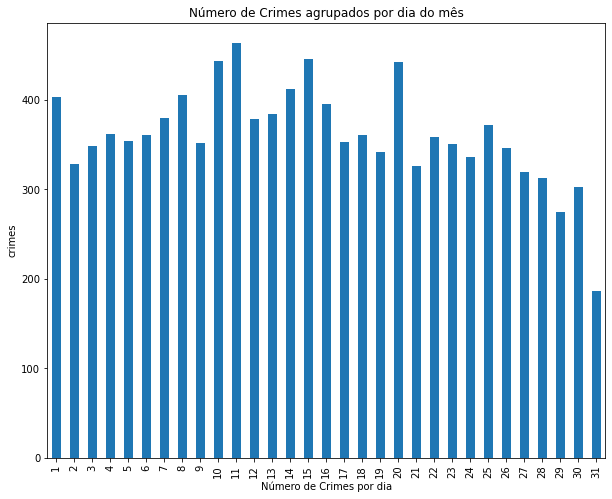

In [24]:
# índice de crimes por dia
# criando a visualização
fig,ax = plt.subplots(figsize=(10,8))
df_clean.groupby([df_clean.index.day]).size().plot(kind='bar')
# definindo o título do eixo y
plt.ylabel('crimes')
# definindo o título do eixo x
plt.xlabel('Número de Crimes por dia')
# definindo o título da visualização
plt.title('Número de Crimes agrupados por dia do mês')
#plotando a visualização
plt.show()

A visualização abaixo nos mostra algumas informações interessantes, como:

Os piores horários do dia, com maior criminalidade são entre 18:00 e 23:00. 

Os horários com menor indice de crimes são os da madrugada.

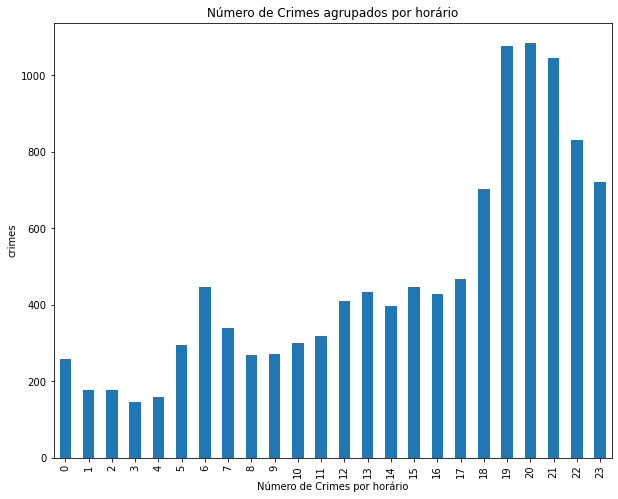

In [25]:
# índice de crimes por horario
# criando a visualização
fig,ax = plt.subplots(figsize=(10,8))
df_clean.groupby([df_clean.index.hour]).size().plot(kind='bar')
# definindo o título do eixo y
plt.ylabel('crimes')
# definindo o título do eixo x
plt.xlabel('Número de Crimes por horário')
# definindo o título da visualização
plt.title('Número de Crimes agrupados por horário')
#plotando a visualização
plt.show()

A visualização abaixo nos mostra algumas informações interessantes, como:

Dia 25/6/2014 foi o dia com maior numero de crimes.

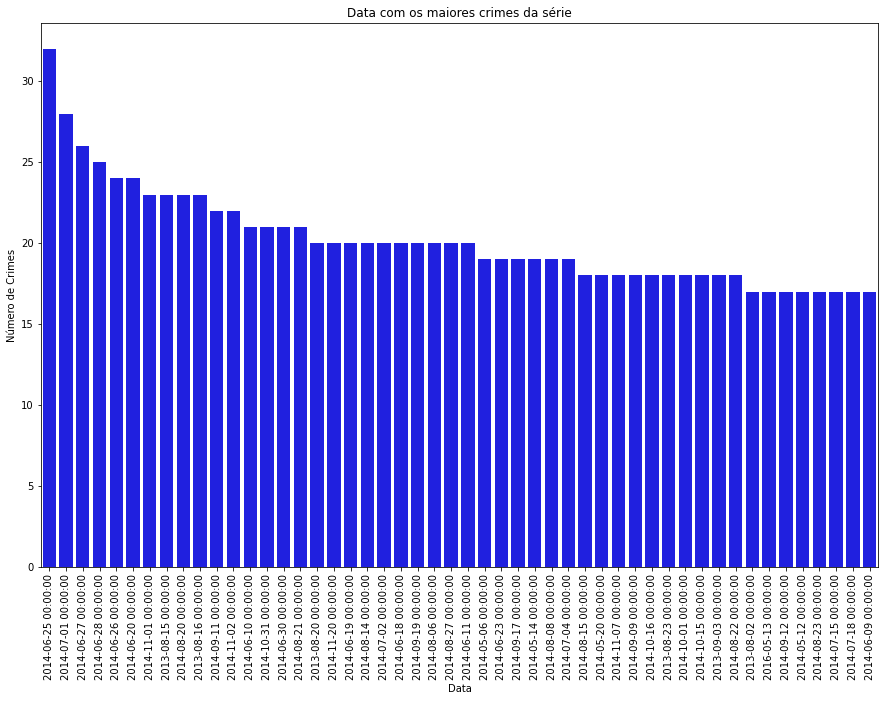

In [26]:

# coletando e ordenando os valores para cada dia
dias = df1.data.value_counts().sort_values(ascending=False).iloc[0:50]

# criando a visualização
fig,ax = plt.subplots(figsize=(15,10))
sns.barplot(dias.index, dias.values, color="blue");

# definindo o título do eixo y
plt.ylabel('Número de Crimes')
# definindo o título do eixo x
plt.xlabel('Data')
# definindo o título da visualização
plt.title('Data com os maiores crimes da série')
# rotacionando a legenda do eixo x para melhor visualização
plt.xticks(rotation=90);
# plotando a visualização
plt.show()


<h1 style="background-color:#B0E0E6; " >4 - Execução de correlação.</h1>

Fazendo a correlação percebemos algumas correlações:

1 - Correlação entre roubo de Documentos e cartão de crédito juntos.

2 - Entre TV e computador.

3 - Carteira e cartão de credito.

In [27]:
df_clean['Documentos'].corr(df_clean['Cartão de Crédito'])

0.7127711163688609

In [28]:
df_clean['Carteira'].corr(df_clean['Cartão de Crédito'])

0.6561294772509234

In [29]:
df_clean['Tv'].corr(df_clean['Computador'])

0.609560221850963

In [30]:
df_clean.drop('id', axis = 1).corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('Blues'), axis=1)

,latitude,longitude,registrou_bo,sexo,tipo_assalto_id,valor_prejuizo,Bicicleta,Bolsa ou Mochila,Carteira,Cartão de Crédito,Celular,Computador,DVD,Dinheiro,Documentos,Equipamento de Som,Estepe,MP4 ou Ipod,Móveis,Notebook,Outros,Relógio,Som,Tablet,Tv
latitude,1.0,0.55,0.0091,0.015,0.0017,-0.00028,0.0029,-0.024,-0.0044,0.0041,-0.0089,-0.00077,0.0016,0.0092,0.0054,-0.0012,-0.0016,-0.0075,-0.0049,-0.0084,-0.0027,-0.016,-0.00011,-0.0022,-0.00053
longitude,0.55,1.0,0.011,0.016,0.0014,0.0077,-0.0041,-0.011,0.01,0.015,-0.015,0.0075,0.007,3.5e-05,0.017,0.0016,0.0036,-0.0039,3.8e-05,-0.0012,0.017,-0.0073,0.0087,0.00081,0.011
registrou_bo,0.0091,0.011,1.0,-0.01,0.0037,0.11,-0.031,0.19,0.2,0.26,0.096,0.026,0.021,0.11,0.3,-0.06,-0.078,0.044,-0.0035,0.1,0.11,0.058,0.018,0.06,0.034
sexo,0.015,0.016,-0.01,1.0,0.068,0.046,0.054,-0.12,0.0011,-0.051,-0.085,0.0054,0.0022,0.028,-0.038,0.04,0.021,0.019,0.027,0.068,0.062,0.073,0.012,0.014,0.014
tipo_assalto_id,0.0017,0.0014,0.0037,0.068,1.0,0.096,-0.019,0.045,-0.028,0.014,-0.26,0.089,0.084,0.062,0.026,0.11,0.11,0.0062,0.055,0.076,0.23,0.0084,0.085,0.038,0.12
valor_prejuizo,-0.00028,0.0077,0.11,0.046,0.096,1.0,0.0029,0.038,0.0089,0.038,-0.067,0.048,0.027,0.0074,0.052,-0.0042,-0.021,0.025,0.025,0.081,0.12,0.044,0.031,0.05,0.037
Bicicleta,0.0029,-0.0041,-0.031,0.054,-0.019,0.0029,1.0,-0.019,-0.036,-0.01,-0.098,0.045,0.065,0.014,-0.02,0.014,0.0069,0.038,0.11,0.038,-0.06,0.011,0.082,0.058,0.041
Bolsa ou Mochila,-0.024,-0.011,0.19,-0.12,0.045,0.038,-0.019,1.0,0.47,0.49,0.12,0.065,0.059,0.19,0.56,-0.013,-0.044,0.17,0.034,0.24,0.12,0.18,0.05,0.19,0.024
Carteira,-0.0044,0.01,0.2,0.0011,-0.028,0.0089,-0.036,0.47,1.0,0.66,0.25,0.0053,0.019,0.26,0.68,-0.063,-0.087,0.12,0.014,0.1,0.024,0.23,0.013,0.11,-0.023
Cartão de Crédito,0.0041,0.015,0.26,-0.051,0.014,0.038,-0.01,0.49,0.66,1.0,0.23,0.0091,0.016,0.27,0.71,-0.039,-0.062,0.15,0.022,0.14,0.12,0.25,0.024,0.14,-0.012


In [31]:
#df.drop('id', axis = 1).cov()

df.drop('id', axis = 1).cov().style.format("{:.2}").background_gradient(cmap=plt.get_cmap('Greens'), axis=1)


,id.1,latitude,longitude,sexo,tipo_assalto_id,user_id,valor_prejuizo
id.1,6.2e+08,2.5e+02,1.9e+02,2.9e+02,1.1e+04,3.7e+07,2.5e+06
latitude,2.5e+02,0.13,0.089,0.0025,0.0032,5.6e+01,-1.0
longitude,1.9e+02,0.089,0.19,0.0029,0.0055,-0.68,3.4e+01
sexo,2.9e+02,0.0025,0.0029,0.24,0.087,-2.5,2.3e+02
tipo_assalto_id,1.1e+04,0.0032,0.0055,0.087,8.0,-2.8e+02,2.8e+03
user_id,3.7e+07,5.6e+01,-0.68,-2.5,-2.8e+02,2.6e+07,7.5e+05
valor_prejuizo,2.5e+06,-1.0,3.4e+01,2.3e+02,2.8e+03,7.5e+05,1.2e+08


<h1 style="background-color:#B0E0E6; " >5 - Conclusão.</h1>
</br>


Com base nas informações obtidas percebemos que na cidade de São Paulo os crimes se localizam na região central, sendo celular o item mais roubado, sendo que os horarios mais perigosos estão entre as 18:00h e 23:00h.
    
Quarta, quintas e sextas-feiras são os dias de semana com maior incidência, mas segundas e terças também possuem altos incidices de roubos , durante os finais de semana esses indicies caem.

O Valor médio de prejuizo ficou em R$ 2.745,26. 

Percebemos também que os furtos de celulares ocorrem de forma única, ou seja, não são furtados outros itens, entretanto cartão de credito é seguido de documentos e carteira e Televisão seguidos de computador.  

Os homens possuem maior incidência de roubos e o maior ocorrÊncia é no retorno do trabalho para casa.

No período análisado percebemos um pico de criminalidade no ano de 2014, sendo que a maioria dos 50 piores dias foram nesse ano.

Houve uma diminuição na criminalidade já no ano seguinte em 2015 e com uma nova alta do crescimento nos anos de 2016 e 2017, com redução em 2018.

Em face ao exposto ações de segurança publica devem se concentrar na região central, nos horários entre 18:00 e 23:00 no retorno do cidadão do trabalho para casa nos dias úteis com foco no furto de celulares. 

